<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/12-Image%20and%20Video%20Analytics/Angle_detection_using_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import math
import matplotlib.pyplot as plt

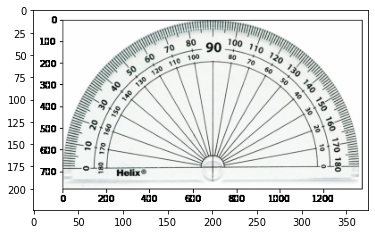

In [2]:
path_of_image = 'protractor.jpg'
image_angle = cv2.imread(path_of_image)
plt.imshow(image_angle)
dots_list = []

In [3]:
def dots_of_mouse(mouse_click,x_cor,y_cor,flag_var,parameters):
    if mouse_click == cv2.EVENT_LBUTTONDOWN:
        size_of_dot = len(dots_list)
        if size_of_dot != 0 and size_of_dot % 3 != 0:
            cv2.arrowedLine(image_angle,tuple(dots_list[round((size_of_dot-1)/3)*3]),(x_cor,y_cor),(0,0,255),2)
        cv2.circle(image_angle,(x_cor,y_cor),5,(0,0,255),cv2.FILLED)
        dots_list.append([x_cor,y_cor])

In [4]:
def finding_gradient(dot1,dot2):
    return (dot2[1]-dot1[1])/(dot2[0]-dot1[0])

In [5]:
def evaluate_angle(dots_list):
    dot1, dot2, dot3 = dots_list[-3:]
    m1 = finding_gradient(dot1,dot2)
    m2 = finding_gradient(dot1,dot3)
    angleR = math.atan((m2-m1)/(1+(m2*m1)))
    angleD = round(math.degrees(angleR))
 
    cv2.putText(image_angle,str(angleD),(dot1[0]-40,dot1[1]-20),cv2.FONT_HERSHEY_COMPLEX,
                1.5,(0,0,255),2)

In [ ]:
while True:

    if len(dots_list) % 3 == 0 and len(dots_list) !=0:
        evaluate_angle(dots_list)
 
    cv2.imshow('Image',image_angle)
    img = cv2.imread('logo.jpg',1)
    cv2.setMouseCallback('Image',dots_of_mouse)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        dots_list = []
        image_angle = cv2.imread(path_of_image)